### BEAUTIFUL SOUP

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re


In [4]:
url_coches = 'https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2'
llamada_coches = requests.get(url_coches)
llamada_coches.status_code

200

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
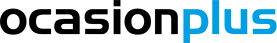

In [5]:
sopa_coches=BeautifulSoup(llamada_coches.content,'html.parser')
print(sopa_coches.prettify())

In [6]:
lista_nombre_coche = sopa_coches.find_all('h2',{'style':'overflow-x:hidden'})
lista_nombre_coche

[<h2 style="overflow-x:hidden">Nissan Juke DIG-T N-Connecta 4x2 (117 CV)</h2>,
 <h2 style="overflow-x:hidden">BMW X2 sDrive18d  (150 CV)</h2>,
 <h2 style="overflow-x:hidden">SEAT Leon ST 1.2 TSI S&amp;S Style (110 CV)</h2>,
 <h2 style="overflow-x:hidden">Peugeot 2008 SUV BlueHDi 100 Allure (100 CV)</h2>,
 <h2 style="overflow-x:hidden">Toyota C-HR 2.0 180H Advance (184 CV)</h2>,
 <h2 style="overflow-x:hidden">Fiat 500C Sport Cabrio (69 CV)</h2>,
 <h2 style="overflow-x:hidden">Ford Puma 1.0 EcoBoost (155CV) ST-Line X HEV Híbrido</h2>,
 <h2 style="overflow-x:hidden">Hyundai i20 1.0 TGDI 48V Klass (100 CV)</h2>,
 <h2 style="overflow-x:hidden">Renault Kangoo Combi Extrem M1-AF dCi(110 CV)</h2>,
 <h2 style="overflow-x:hidden">Peugeot 208 1.2 PureTech Allure (82 CV)</h2>,
 <h2 style="overflow-x:hidden">Volkswagen Touran Sport 1.4 TSI(150 CV) 7plz</h2>,
 <h2 style="overflow-x:hidden">Dacia Logan MCV Laureate dCi  (75 CV)</h2>,
 <h2 style="overflow-x:hidden">Ford Focus 2.0 TDCi S&amp;S Titanium

In [7]:
nombre_coches= []

for i in lista_nombre_coche:
    nombre_coches.append(i.getText())
nombre_coches

['Nissan Juke DIG-T N-Connecta 4x2 (117 CV)',
 'BMW X2 sDrive18d  (150 CV)',
 'SEAT Leon ST 1.2 TSI S&S Style (110 CV)',
 'Peugeot 2008 SUV BlueHDi 100 Allure (100 CV)',
 'Toyota C-HR 2.0 180H Advance (184 CV)',
 'Fiat 500C Sport Cabrio (69 CV)',
 'Ford Puma 1.0 EcoBoost (155CV) ST-Line X HEV Híbrido',
 'Hyundai i20 1.0 TGDI 48V Klass (100 CV)',
 'Renault Kangoo Combi Extrem M1-AF dCi(110 CV)',
 'Peugeot 208 1.2 PureTech Allure (82 CV)',
 'Volkswagen Touran Sport 1.4 TSI(150 CV) 7plz',
 'Dacia Logan MCV Laureate dCi  (75 CV)',
 'Ford Focus 2.0 TDCi S&S Titanium (150 CV)',
 'Volkswagen Touran 1.6 TDI SCR BMT 7 PLAZAS  (115 CV)',
 'Peugeot 208 PureTech Style (82 CV)',
 'Fiat 500X 1.6 MultiJet Cross 4x2 (120 CV)',
 'Fiat Tipo Sedan FIAT Tipo Sedan 1.3 Multijet 70kW (95CV) Lounge',
 'Toyota C-HR 180H Advance Luxury (184 CV)',
 'Kia Carens 1.6 GDi Concept  (135 CV)',
 'Peugeot 5008 SUV SUV BlueHDi 120 S&S Allure 7 PLAZAS (120 CV)']

In [12]:
lista_precios_coches = sopa_coches.find_all('span',{'class':'jsx-2689423372 price'})

precio_coches= []

for i in lista_precios_coches:
    precio_coches.append(i.getText())

precio_coches

# SI NOS DA TIEMPO, HACER EL SPLIT Y CONVERTIR A FLOAT

['16.272€',
 '24.818€',
 '10.900€',
 '8.000€',
 '22.636€',
 '8.954€',
 '19.772€',
 '18.264€',
 '13.545€',
 '9.991€',
 '24.090€',
 '10.227€',
 '14.364€',
 '14.536€',
 '9.363€',
 '13.000€',
 '15.000€',
 '25.227€',
 '14.091€',
 '19.990€']

In [9]:
precio_original = sopa_coches.find_all('span',{'class':'jsx-2870186023 priceLast'})
precio_original

lista_precio_original= []

for i in precio_original:
    lista_precio_original.append(i.getText())
lista_precio_original

# SI NOS DA TIEMPO, HACER EL SPLIT Y CONVERTIR A FLOAT

['17.900€',
 '27.300€',
 '11.990€',
 '8.800€',
 '24.900€',
 '9.850€',
 '21.750€',
 '20.090€',
 '14.900€',
 '10.990€',
 '26.500€',
 '11.250€',
 '15.800€',
 '15.990€',
 '10.300€',
 '14.300€',
 '16.500€',
 '27.750€',
 '15.500€',
 '21.990€']

In [10]:
kilometros = sopa_coches.find_all('span',{'class':'jsx-3960002075 detail big'})
kilometros

lista_kilometros= []

for i in kilometros:
    lista_kilometros.append(i.getText())
lista_kilometros

#nueva_lista = []
#for i in lista_kilometros:
#    if re.search(r'\d+\.\d+\s*km',i):
#        nueva_lista.append(i)
    
km_definitivos = []
for k in lista_kilometros:
    if "km" in k:
        km_definitivos.append(k)
km_definitivos

km_definitivos

['84.572 km',
 '54.158 km',
 '145.772 km',
 '169.229 km',
 '31.442 km',
 '88.922 km',
 '31.842 km',
 '17.108 km',
 '123.362 km',
 '55.786 km',
 '47.382 km',
 '63.204 km',
 '81.070 km',
 '144.376 km',
 '18.502 km',
 '61.185 km',
 '44.136 km',
 '53.662 km',
 '65.962 km',
 '56.343 km']